In [229]:
import pandas as pd
import numpy as np
df=pd.read_csv('dt3.csv')
df['Gia']=df['Gia'].replace('[*₫Giá dự kiến: .]','',regex=True)
df['Gia']=pd.to_numeric(df['Gia']).astype(int)
df=df.dropna(axis=0,how='any')
df


,Name,Brand,Display,HDH,Camera sau,Camera trước,Chip,Ram,Rom,Sim,Battery,Gia,Danh gia,So Luong,Link,Tên cửa hàng
0,Điện thoại Samsung Galaxy S22 Ultra 5G 128GB,Samsung,"Dynamic AMOLED 2X,6.8"",Quad HD+ (2K+)",Android 12,"Chính 108 MP & Phụ 12 MP, 10 MP, 10 MP",40 MP,Snapdragon 8 Gen 1 8 nhân,8 GB,128 GB,2 Nano SIM hoặc 1 Nano SIM + 1 eSIM,5000 mAh,30990000,3.0,18,https://www.thegioididong.com/dtdd/samsung-gal...,Thế giới đi động
1,Điện thoại iPhone 11 64GB,iPhone,"IPS LCD,6.1"",Liquid Retina",iOS 15,2 camera 12 MP,12 MP,Apple A13 Bionic,4 GB,64 GB,1 Nano SIM & 1 eSIM,3110 mAh,14990000,4.0,817,https://www.thegioididong.com/dtdd/iphone-11?s...,Thế giới đi động
2,Điện thoại OPPO Reno7 Z 5G,OPPO,"AMOLED,6.43"",Full HD+",Android 11,"Chính 64 MP & Phụ 2 MP, 2 MP",16 MP,Snapdragon 695 5G 8 nhân,8 GB,128 GB,2 Nano SIM (SIM 2 chung khe thẻ nhớ),4500 mAh,10490000,3.8,81,https://www.thegioididong.com/dtdd/oppo-reno7-...,Thế giới đi động
3,Điện thoại Realme C35 64GB,Realme,"IPS LCD,6.6"",Full HD+",Android 11,"Chính 50 MP & Phụ 2 MP, 0.3 MP",8 MP,Unisoc T616 8 nhân,4 GB,64 GB,2 Nano SIM,5000 mAh,3990000,3.5,94,https://www.thegioididong.com/dtdd/realme-c35?...,Thế giới đi động
4,Điện thoại Xiaomi 11T 5G 128GB,Xiaomi,"AMOLED,6.67"",Full HD+",Android 11,"Chính 108 MP & Phụ 8 MP, 5 MP",16 MP,MediaTek Dimensity 1200,8 GB,128 GB,2 Nano SIM,5000 mAh,10990000,3.8,310,https://www.thegioididong.com/dtdd/xiaomi-11t?...,Thế giới đi động
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Nubia Red Magic 6,Nubia,"Android 11, Redmagic 4.0","Android 11, Redmagic 4.0","Camera chính: 64 MP, f/1.8 Camera góc siêu rộ...","8MP, f/2.0",Snapdragon 888 5G (5 nm),12 GB,128 GB,2 SIM (Nano-SIM),Li-Po 5050mAh,16990000,5.0,8,https://cellphones.com.vn/nubia-red-magic-6.html,Cellphones
215,Xiaomi POCO X3 NFC 128GB,Xiaomi,"Android 10, MIUI 12","Android 10, MIUI 12","Camera chính: 64 MP, f/1.9, (wide), 1/1.73"", 0...","20 MP, f/2.2, (wide), 1/3.4"", 0.8µm",Qualcomm SM7150-AC Snapdragon 732G (8 nm),6 GB,128 GB,2 SIM (Nano-SIM),Li-Po 5160 mAh Sạc nhanh 33W,5700000,4.5,21,https://cellphones.com.vn/xiaomi-poco-x3.html,Cellphones
216,OPPO A15,OPPO,Android 10,Android 10,"13 MP, f/2.2, (wide), 1/3.1"", 1.12µm, PDAF 2 M...","8 MP, (wide)",Mediatek MT6765 Helio P35 (12nm),3 GB,32 GB,2 SIM (Nano-SIM),Li-Po 4230 mAh,3290000,4.0,3,https://cellphones.com.vn/oppo-a15.html,Cellphones
217,OPPO Reno5,OPPO,"ColorOS 11.1, Nền tảng Android 11","ColorOS 11.1, Nền tảng Android 11",64 MP + 8 MP + 2 MP + 2 MP,"44 MP, F/2.4, Cảm biến thông minh AI","Qualcomm Snapdragon 720G, tối đa 2.3GHz",8 GB,128 GB,2 SIM (Nano-SIM),"4310mAh (Typ), Sạc siêu nhanh",7790000,4.8,26,https://cellphones.com.vn/oppo-reno-5.html,Cellphones


Task: Tính doanh thu của từng nhà sản xuất, vẽ biểu đồ, thương hiệu nào bán chạy nhất kể từ khi ra mắt

Product has most sales is iPhone with 54650754000 sales


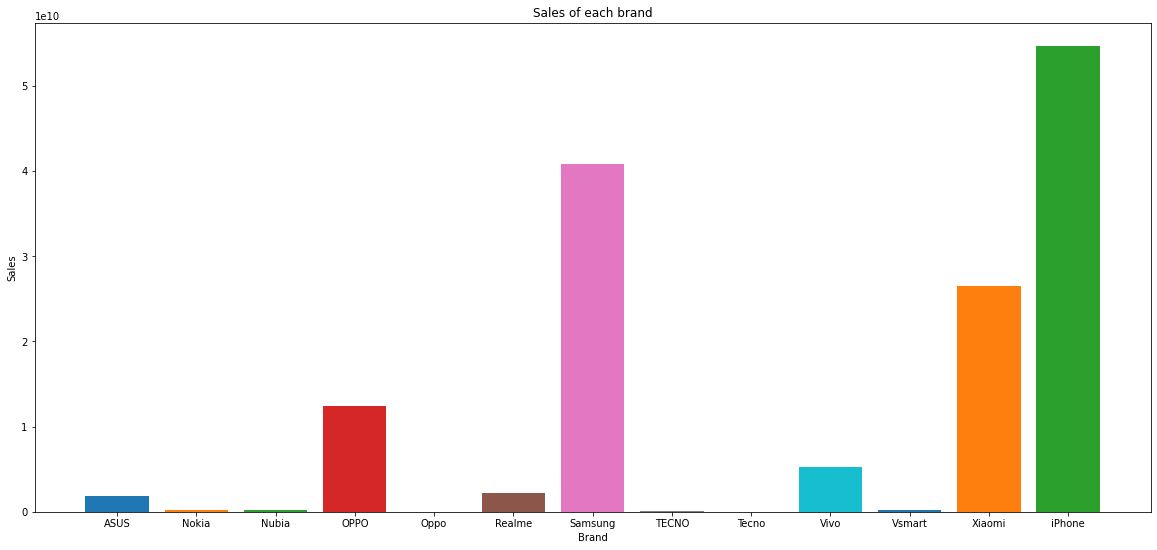

In [230]:
import numpy as np
import matplotlib.pyplot as plt
df1=df
df1['Sales']=df['Gia']*df['So Luong']
df1.head()
sale_values=df1.groupby('Brand').sum()['Sales']
sale_values
plt.figure(figsize=(20,9))
for i,y in sale_values.items():
    plt.bar(i,y)
    plt.xlabel('Brand')
    plt.ylabel('Sales')
    plt.title('Sales of each brand')
    if y==sale_values.max():
        print('Product has most sales is',i,'with',y,'sales')



Task: Tìm những chiếc điện thoại bán chạy và được đánh giá cao trong tầm giá 8 triệu đồng, trong đó điện thoại nào bán được nhiều nhất

In [231]:
df2=df
df2_tmp=df2.loc[(df2['Gia']<8000000)&(df2['Danh gia']>=4)&(df2['Gia']>5000000)]
most_brn=df2_tmp.loc[:,['Name','Brand','Gia','Danh gia','So Luong','Tên cửa hàng','Link']]

most_brn.sort_values(by='So Luong',ascending=False,inplace=True)




Product has most quanity is Điện thoại OPPO A95 with 263 sales


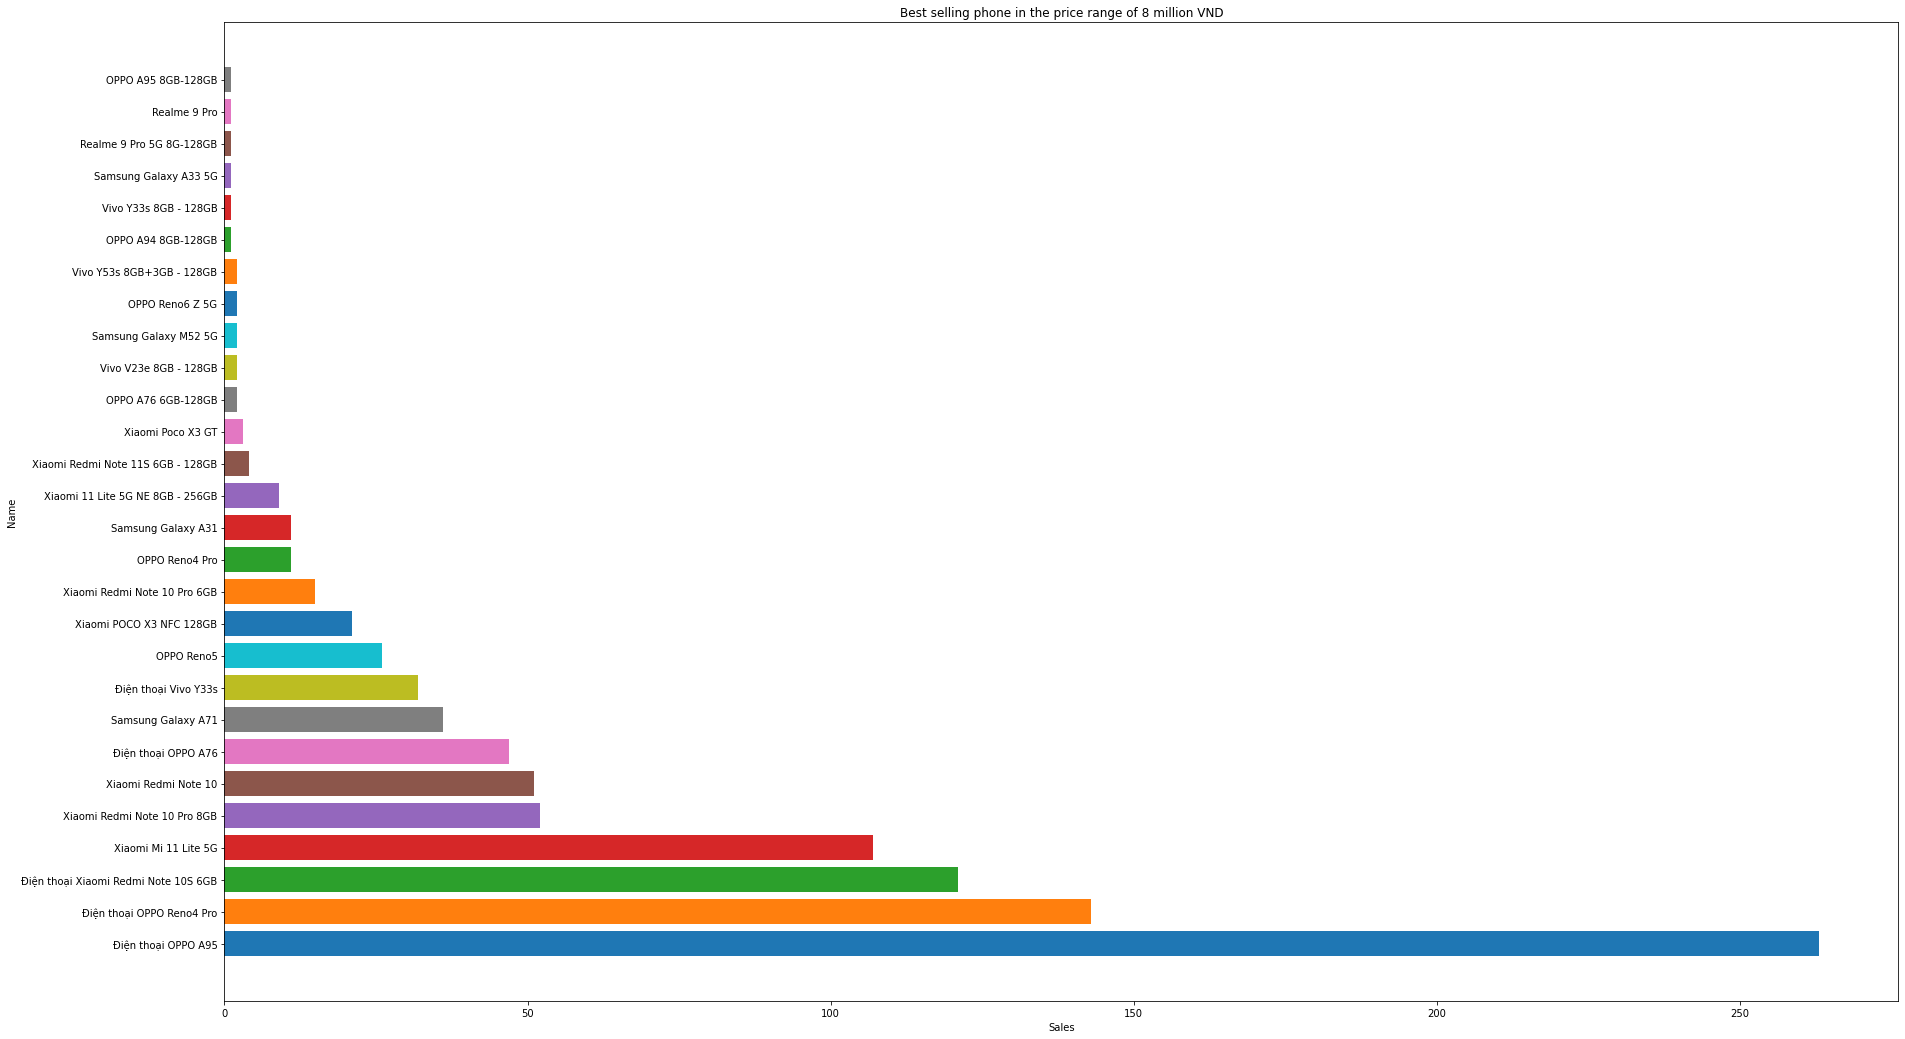

In [232]:
tm_mst=most_brn.groupby('Name').max()['So Luong'].sort_values(ascending=False)
plt.figure(figsize=(30,18))
for i, y in tm_mst.items():
    plt.barh(i,y)
    plt.ylabel('Name')
    plt.xlabel('Sales')
    plt.title('Best selling phone in the price range of 8 million VND')
    if y==tm_mst.max():
        print('Product has most quanity is',i,'with',y,'sales')

Task: Tìm những chiếc điện thoại có sử dụng chip Snapdragon, đánh giá xem những chiếc điện thoại sử dụng chip Snap có đem lại tiềm năng không?

In [233]:
def chip_snd(st1):
    st1=st1.split(' ')[0]
    return st1

<Figure size 3600x1440 with 0 Axes>

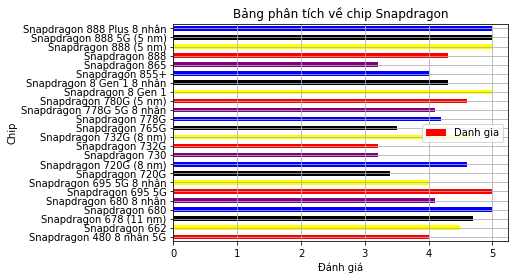

In [234]:



df.head()
df3=df.loc[:,['Name','Chip','Danh gia']]
df3['Chip Sn']=df3['Chip'].apply(chip_snd)
snd_tmp=df3.loc[(df3['Chip Sn']=='Snapdragon')]
snd_tmp2=snd_tmp.groupby('Chip')
snd_tmp2_avg=snd_tmp2.mean()
snd_tmp2_avg=round(snd_tmp2_avg.reset_index(),1)
#snd_tmp2_avg.to_csv('snd_tmp2_avg.csv')

    
c = ['red', 'yellow', 'black', 'blue', 'purple']
plt.figure(figsize=(50,20))
snd_tmp2_avg.plot(x='Chip',y='Danh gia',kind='barh',color=c)
plt.title('Bảng phân tích về chip Snapdragon')
plt.xlabel('Đánh giá')
plt.grid()
plt.show()



Task: Những sản phẩm nào bán được nhiều nhất, đưa ra giả thuyết.

In [235]:

df2=pd.read_csv('dt4.csv')

df4=df2.head(50)


df4['Sales']=df4['Gia']*df4['So Luong']
df4_tmp=df4.loc[:,['Name','Gia','Sales']]





C:\Users\Admin\AppData\Local\Temp\ipykernel_19388\252988501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Sales']=df4['Gia']*df4['So Luong']


C:\Users\Admin\AppData\Local\Temp\ipykernel_19388\4287192963.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df4_tmp['Name'],rotation=90)


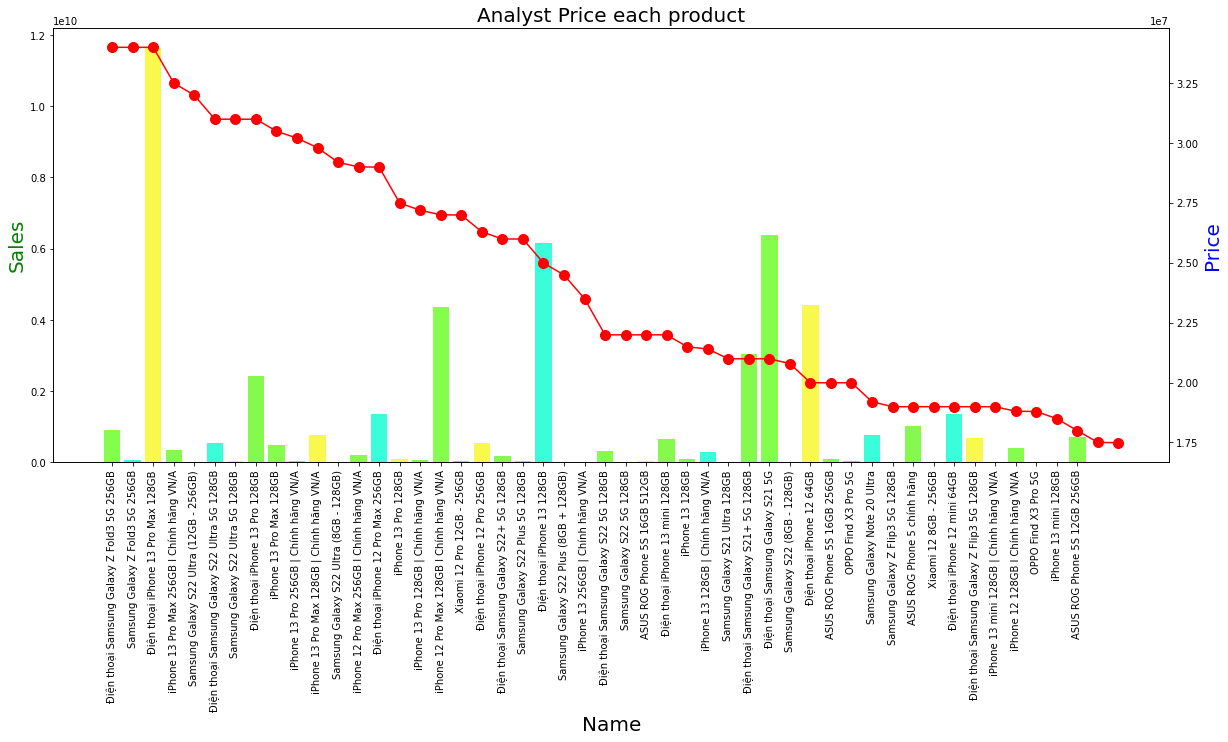

In [236]:

#df4_tmp2=df4_tmp
c=['#85fd4d','#3afdda','#f9f94d','#85f94d']
plt.figure(figsize=(20,8))
ax1=plt.subplot()
ax1.bar(df4_tmp['Name'],df4_tmp['Sales'],color=c)
ax2=ax1.twinx()


ax1.set_xlabel('Name',fontsize=20)
ax2.plot(df4_tmp['Gia'],color='red',marker='.',markersize=20)
ax2.set_ylabel('Price',color='blue',fontsize=20)
ax1.set_ylabel('Sales',color='green',fontsize=20)
ax1.set_xticklabels(df4_tmp['Name'],rotation=90)
plt.title('Analyst Price each product',fontsize=20)
plt.show()

In [237]:
import pandas as pd
pth = 'dt3.csv'
df = pd.read_csv(pth)
df['Chip']=df['Chip'].replace(['Qualcomm','8 nhân','(8 nm)','(12nm)',', tối đa 2.3GHz',' MT6765','()'],'',regex=True)
pd.unique(df["Chip"])

col_list = ['Processors','Rank']
df_rank = pd.read_csv('Smartphone-Processors-Rating.csv', usecols=col_list,index_col=0,squeeze=True)
rank_dict = df_rank.to_dict()

chip_column = df["Chip"]
price_column = df["Gia"]

xep_hang = []

for i in range(len(df)):
    chip_rank = chip_column[i]
    phone_price=price_column[i]

    rank = rank_dict.get(chip_rank)
    if rank == None:
        rank = 0
    result = rank * int(phone_price) 
    #print(result)
    
    xep_hang.append(result)

df['Hieu nang / Gia'] = xep_hang


df2 =  df.loc[df['Gia'] < 10000000]
#sort theo hieu nang /gia
df2 = df2.sort_values(by='Hieu nang / Gia',ascending=False)

df2.head(20)




C:\Users\Admin\AppData\Local\Temp\ipykernel_19388\1046062661.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df_rank = pd.read_csv('Smartphone-Processors-Rating.csv', usecols=col_list,index_col=0,squeeze=True)


,Name,Brand,Display,HDH,Camera sau,Camera trước,Chip,Ram,Rom,Sim,Battery,Gia,Danh gia,So Luong,Link,Tên cửa hàng,Hieu nang / Gia
94,OPPO A95 8GB-128GB,OPPO,"6.43 inch, AMOLED, FHD+, 1080 x 2400 Pixels",Android 11,48.0 MP + 2.0 MP + 2.0 MP,16.0 MP,Snapdragon 662,8 GB,128 GB,2 - 2 Nano SIM,5000 mAh,6990000,5.0,1,https://fptshop.com.vn/dien-thoai/oppo-a95,Cửa hàng FPT,643080000
47,Điện thoại OPPO A95,OPPO,"AMOLED,6.43"",Full HD+",Android 11,"Chính 48 MP & Phụ 2 MP, 2 MP",16 MP,Snapdragon 662,8 GB,128 GB,2 Nano SIM,5000 mAh,6990000,4.0,263,https://www.thegioididong.com/dtdd/oppo-a95-4g...,Thế giới đi động,643080000
46,Điện thoại Vivo Y33s,Vivo,"IPS LCD,6.58"",Full HD+",Android 11,"Chính 50 MP & Phụ 2 MP, 2 MP",16 MP,MediaTek Helio G80,8 GB,128 GB,2 Nano SIM,5000 mAh,6990000,4.1,32,https://www.thegioididong.com/dtdd/vivo-y33s?s...,Thế giới đi động,580170000
48,Điện thoại Vivo Y53s,Vivo,"IPS LCD,6.58"",Full HD+",Android 11,"Chính 64 MP & Phụ 2 MP, 2 MP",16 MP,MediaTek Helio G80,8 GB,128 GB,2 Nano SIM,5000 mAh,6990000,2.2,65,https://www.thegioididong.com/dtdd/vivo-y53s?s...,Thế giới đi động,580170000
58,Điện thoại OPPO A55,OPPO,"IPS LCD,6.5"",HD+",Android 11,"Chính 50 MP & Phụ 2 MP, 2 MP",16 MP,MediaTek Helio G35,4 GB,64 GB,2 Nano SIM,5000 mAh,4990000,3.6,270,https://www.thegioididong.com/dtdd/oppo-a55-4g...,Thế giới đi động,558880000
33,Điện thoại Samsung Galaxy A52 128GB,Samsung,"Super AMOLED,6.5"",Full HD+",Android 11,"Chính 64 MP & Phụ 12 MP, 5 MP, 5 MP",32 MP,Snapdragon 720G,8 GB,128 GB,2 Nano SIM,4500 mAh,9290000,3.0,217,https://www.thegioididong.com/dtdd/samsung-gal...,Thế giới đi động,557400000
49,Điện thoại Samsung Galaxy A32,Samsung,"Super AMOLED,6.4"",Full HD+",Android 11,"Chính 64 MP & Phụ 8 MP, 5MP, 5MP",20 MP,MediaTek Helio G80,6 GB,128 GB,2 Nano SIM,5000 mAh,6490000,3.1,743,https://www.thegioididong.com/dtdd/samsung-gal...,Thế giới đi động,538670000
88,Vivo V23e 8GB - 128GB,Vivo,"6.44 inch, AMOLED, FHD+, 1080 x 2400 Pixels",Android 11,64.0 MP + 8.0 MP + 2.0 MP,50.0 MP,MediaTek Helio G96,8 GB + 4 GB,128 GB,2 - 2 Nano SIM,4050 mAh,7790000,5.0,2,https://fptshop.com.vn/dien-thoai/vivo-v23e,Cửa hàng FPT,521930000
59,Điện thoại OPPO A15s,OPPO,"IPS LCD,6.52"",HD+",Android 10,"Chính 13 MP & Phụ 2 MP, 2 MP",8 MP,MediaTek Helio P35,4 GB,64 GB,2 Nano SIM,4230 mAh,4290000,2.9,139,https://www.thegioididong.com/dtdd/oppo-a15s?s...,Thế giới đi động,493350000
188,OPPO A55,OPPO,"Android 11, ColorOS 11.1","Android 11, ColorOS 11.1","Camera góc rộng: 50 MP, f/2.2, 25mm 1/3.06"", 1...","16 MP, f/2.0",MediaTek Helio G35,4 GB,64 GB,2 SIM (Nano-SIM),Li-Po 5000 mAh,4290000,0.0,0,https://cellphones.com.vn/oppo-a55.html,Cellphones,480480000
